In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = pd.read_csv("telecom_users.csv")
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


CLEANING DATA

In [67]:
#Dropping first column
data = data.drop("Unnamed: 0",axis = 1)

In [68]:
#Attribute "Total charges" has some non-numeric values, making all the values numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors="coerce")

In [69]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [70]:
#Tenure for charges = Nan
TenureForZero = data[data['TotalCharges'].isna()]['tenure']
TenureForZero

356     0
634     0
2771    0
3086    0
3255    0
4326    0
5375    0
5382    0
5695    0
5951    0
Name: tenure, dtype: int64

In [71]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [72]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [126]:
data.shape

(5986, 21)

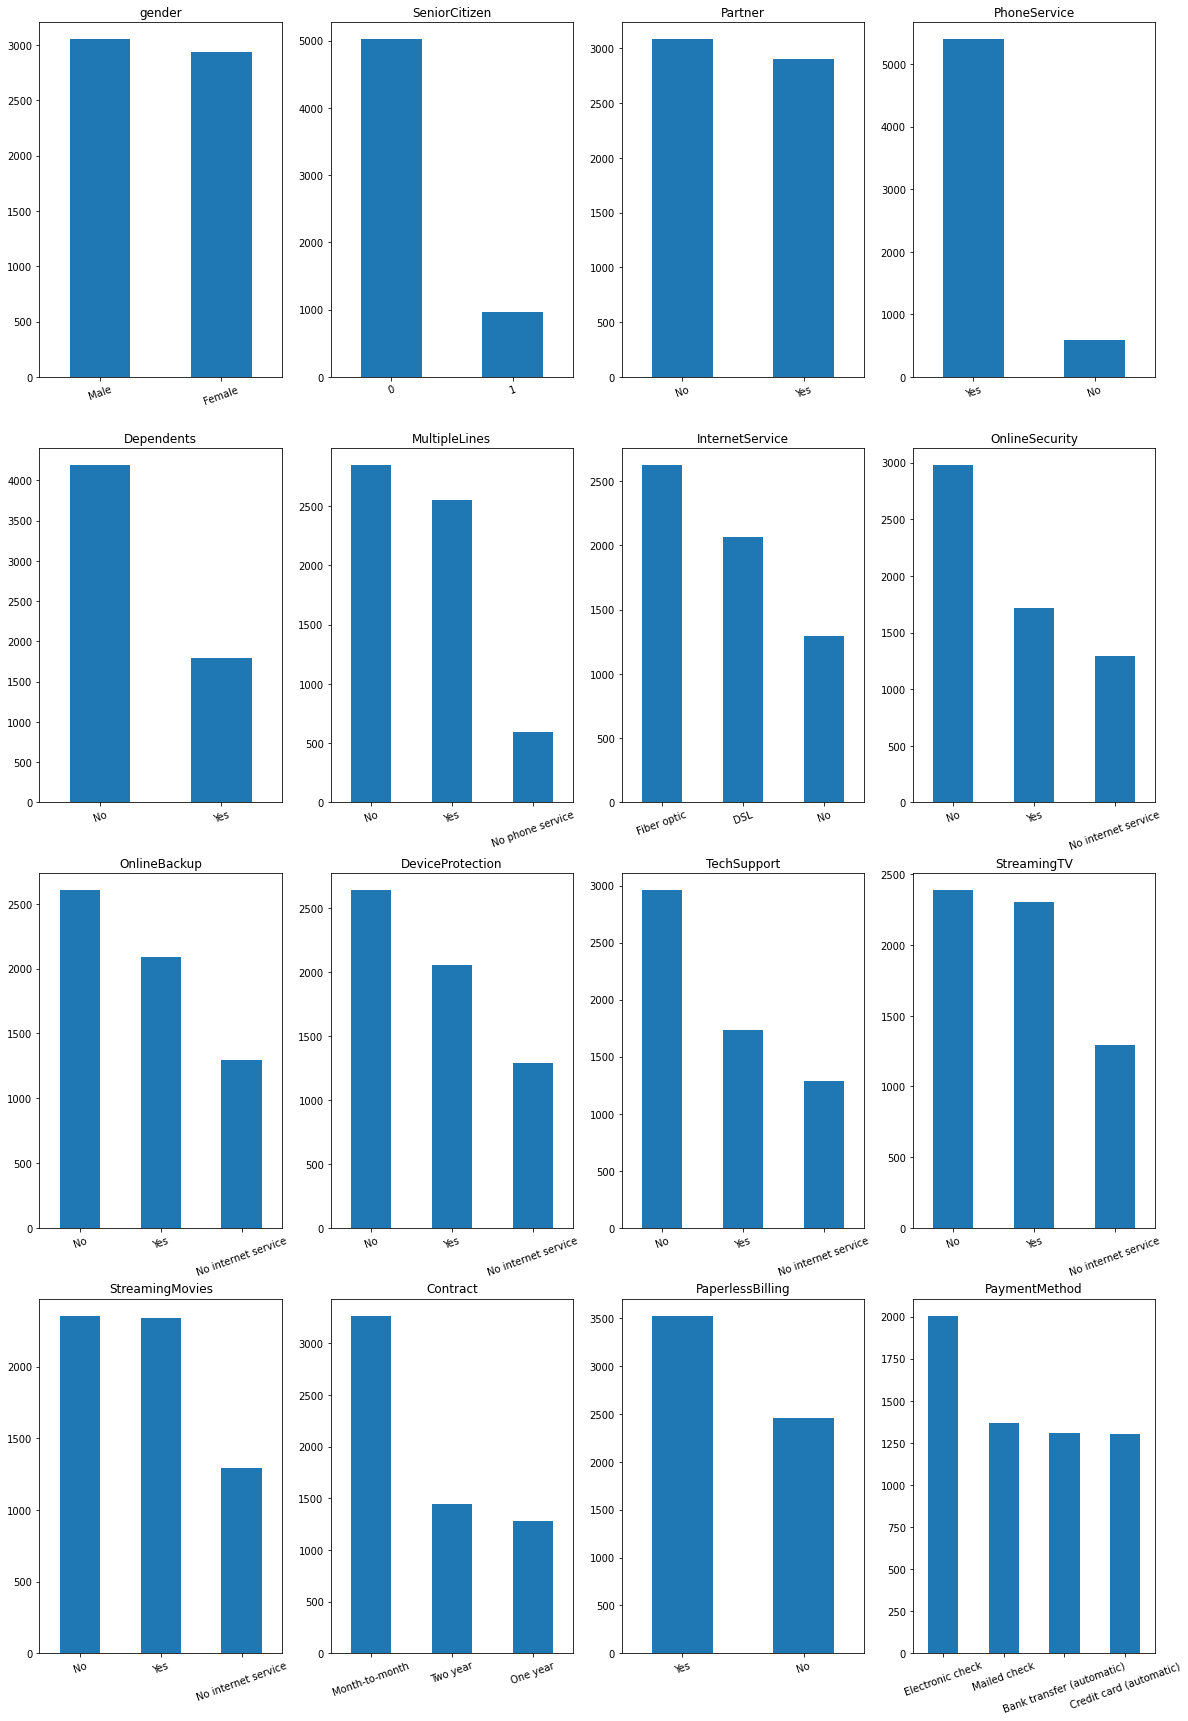

In [74]:
#Distribution of categorical features

cat_features = ['gender','SeniorCitizen','Partner','PhoneService',"Dependents",'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
plt.figure(figsize=(20,30))
for i in range(len(cat_features)):
    plt.subplot(4,4,i+1)
    plt.title(cat_features[i])
    data[cat_features[i]].value_counts().plot(kind='bar')
    plt.xticks(rotation=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Credit card (automatic)'),
  Text(1, 0, 'Bank transfer (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

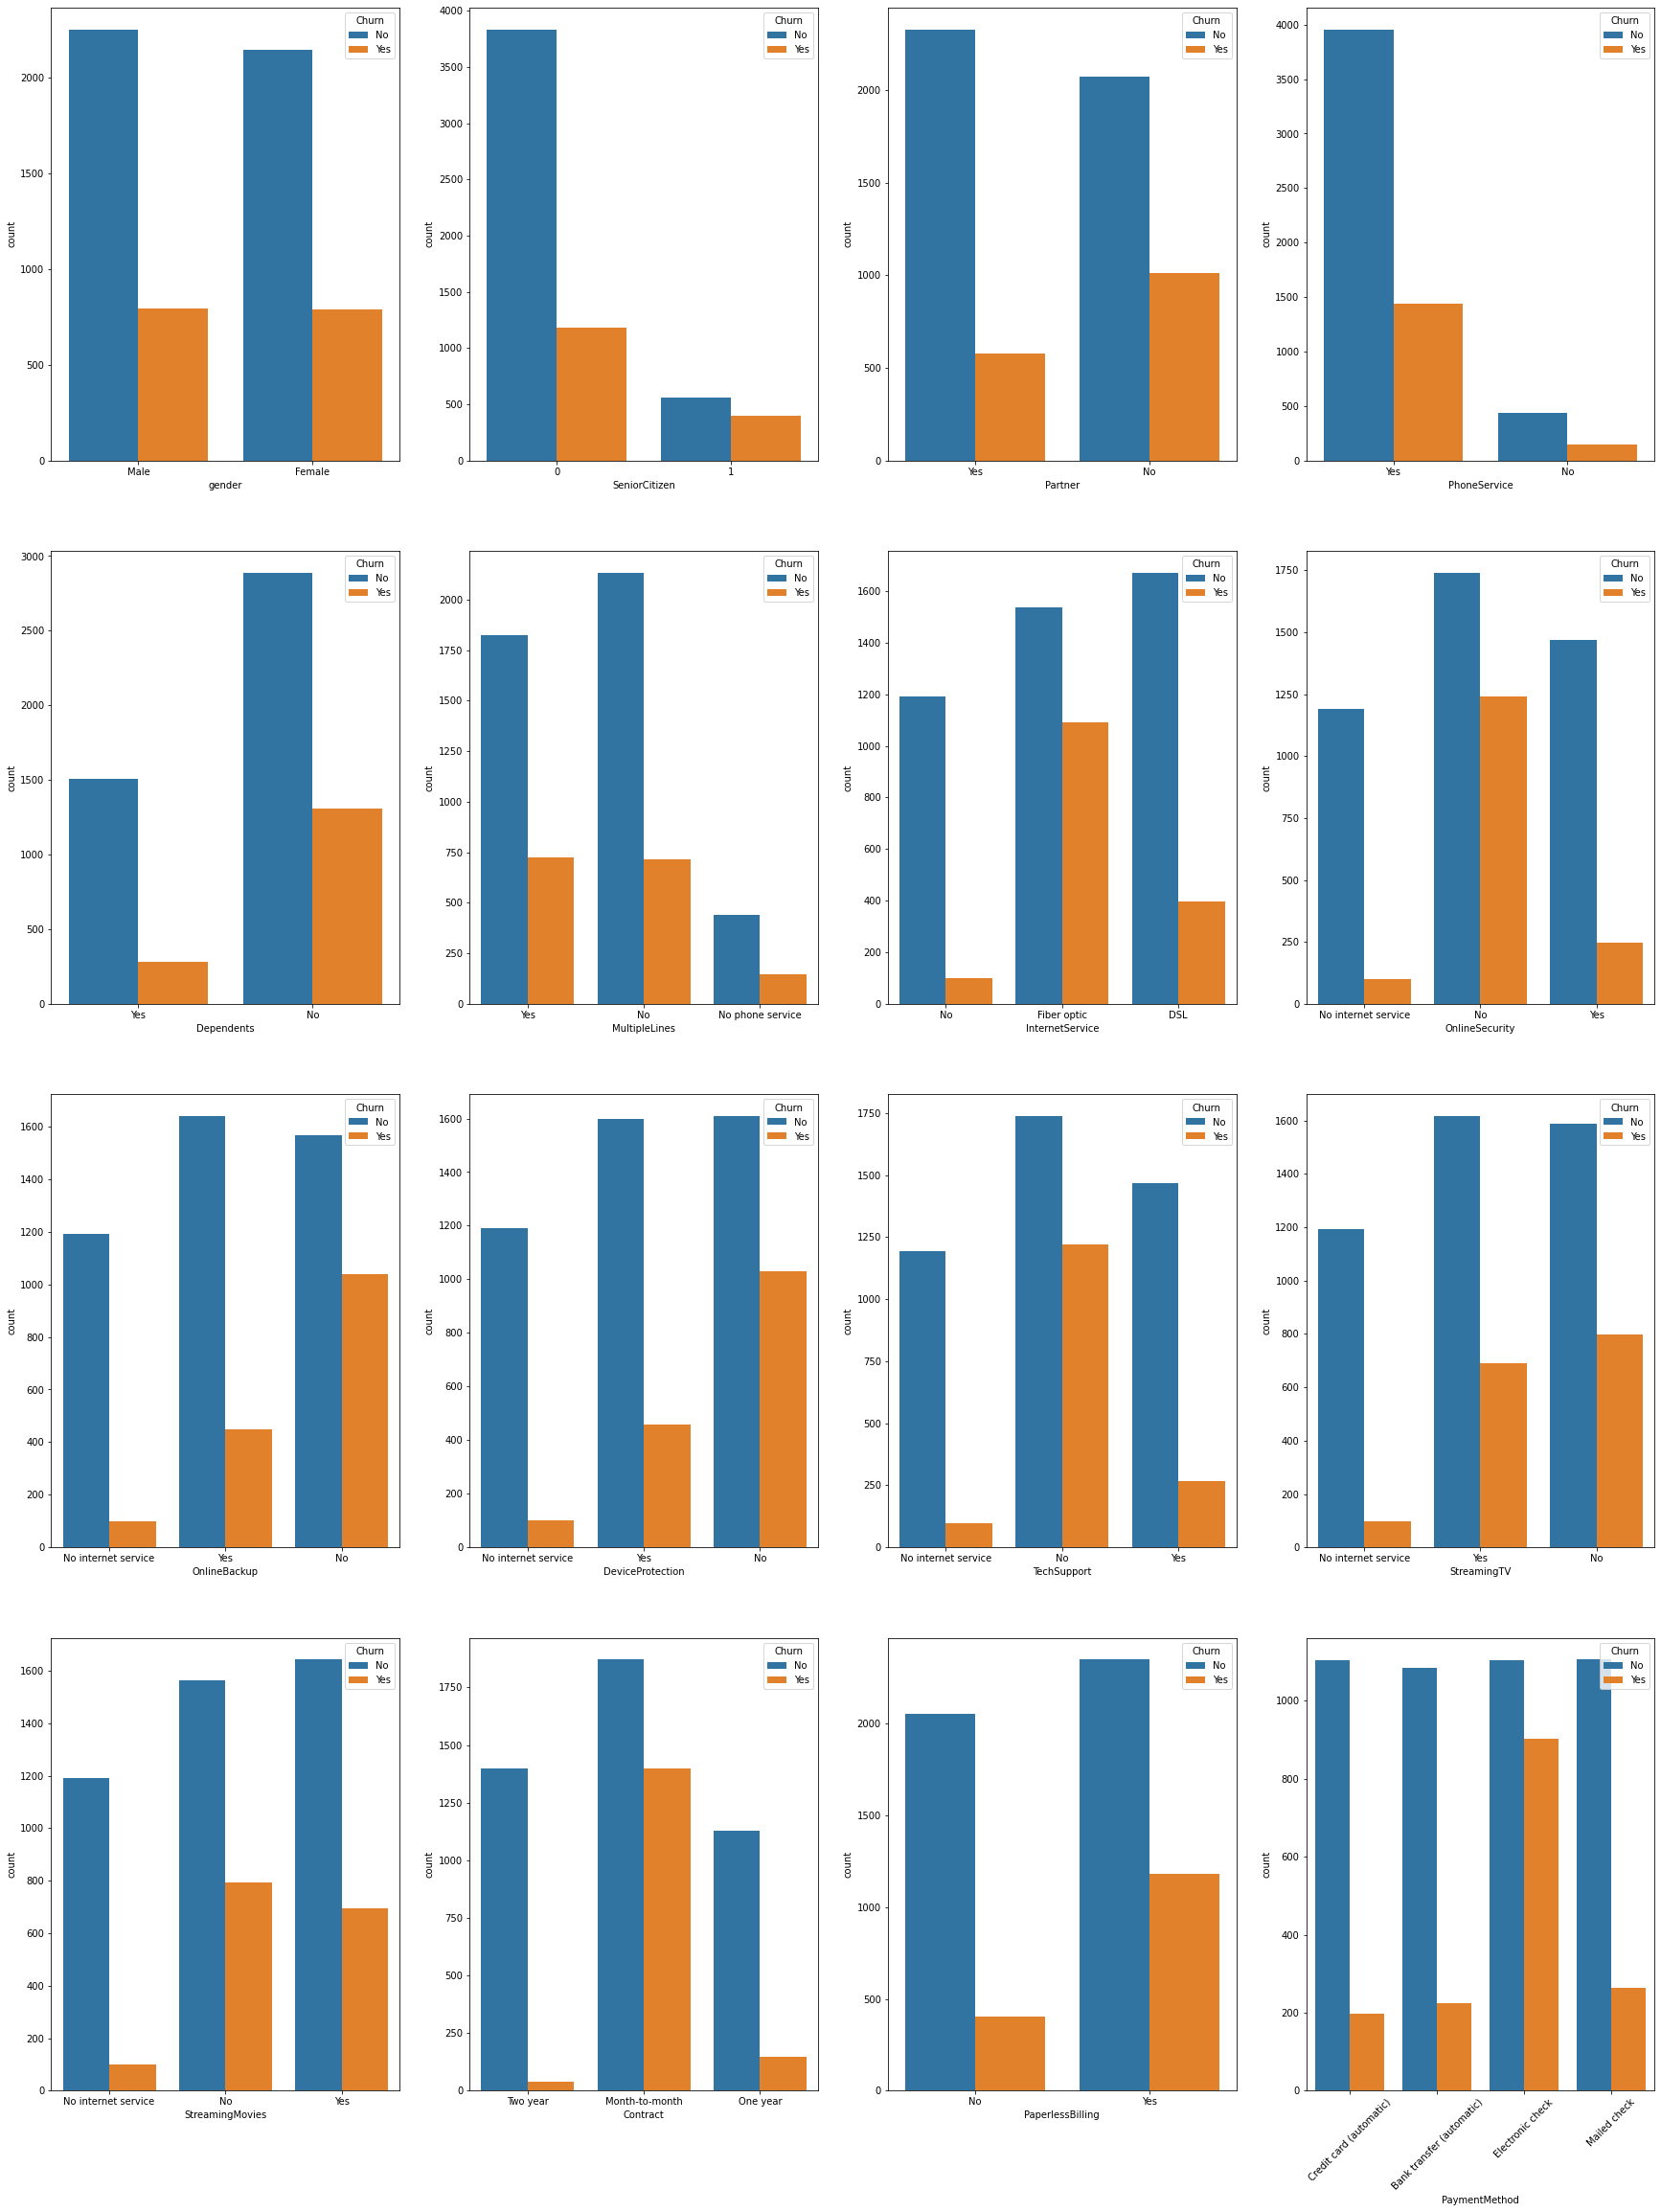

In [75]:
# Dependence of all the categorical features on churn

plt.figure(figsize=(30,40))
for i in range(len(cat_features)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=cat_features[i], hue="Churn", data=data)
plt.xticks(rotation=45)

CONCLUSIONS:

No     4399
Yes    1587
Name: Churn, dtype: int64

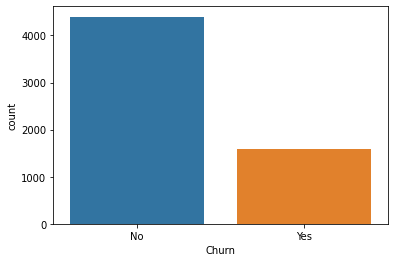

In [76]:
# Churn rate
sns.countplot(x=data['Churn'], data=data)
data['Churn'].value_counts()

Approximately 27% Churn rate 

**CHURN PREDICTION**

**EXTRACTING DEPENDENT AND INDEPENDENT VARIABLES**

In [77]:
# x = independent variables
# y = dependent variables

X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [78]:
print(X)
print(y)

[['Male' 0 'Yes' ... 'Credit card (automatic)' 24.1 1734.65]
 ['Female' 0 'No' ... 'Credit card (automatic)' 88.15 3973.2]
 ['Female' 1 'Yes' ... 'Bank transfer (automatic)' 74.95 2869.85]
 ...
 ['Male' 0 'Yes' ... 'Electronic check' 21.15 306.05]
 ['Male' 1 'No' ... 'Electronic check' 99.45 1200.15]
 ['Male' 0 'No' ... 'Credit card (automatic)' 19.8 457.3]]
['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


**ENCODING CATEGORICAL DATA**

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,3,5,6,7,8,9,10,11,12,13,14,15,16])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [129]:
print(X)
print(X.shape)

[[0.0 1.0 0.0 ... 72 24.1 1734.65]
 [1.0 0.0 1.0 ... 44 88.15 3973.2]
 [1.0 0.0 0.0 ... 38 74.95 2869.85]
 ...
 [0.0 1.0 0.0 ... 12 21.15 306.05]
 [0.0 1.0 1.0 ... 12 99.45 1200.15]
 [0.0 1.0 1.0 ... 26 19.8 457.3]]
(5986, 45)


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [82]:
print(y)

[0 0 1 ... 0 1 0]


**SPLIT TRAIN AND TEST DATASET**

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [128]:
print(X_train)

[[0.0 1.0 1.0 ... 12 112.95 1384.75]
 [1.0 0.0 0.0 ... 3 20.85 72.0]
 [0.0 1.0 1.0 ... 1 50.7 50.7]
 ...
 [1.0 0.0 1.0 ... 15 49.1 679.55]
 [0.0 1.0 1.0 ... 31 81.7 2548.65]
 [1.0 0.0 1.0 ... 4 50.55 235.65]]


In [85]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [86]:
print(y_test)

[0 0 1 ... 0 1 1]


**FEATURE SCALING**


In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, -3:] = sc.fit_transform(X_train[:, -3:])
X_test[:, -3:] = sc.transform(X_test[:, -3:])

In [88]:
print(X_train)

[[0.0 1.0 1.0 ... -0.8366403274957093 1.597618229340929
  -0.40280380267688554]
 [1.0 0.0 0.0 ... -1.2023771268103947 -1.4619827386873008
  -0.9773732646907466]
 [0.0 1.0 1.0 ... -1.283651971102547 -0.47035310898434035
  -0.986695930499846]
 ...
 [1.0 0.0 1.0 ... -0.7147280610574809 -0.5235057859533433
  -0.7114584472110123]
 [0.0 1.0 1.0 ... -0.0645293067202625 0.559480007290091
  0.10661641963348034]
 [1.0 0.0 1.0 ... -1.1617397046643185 -0.47533617245018456
  -0.9057463041433701]]


In [102]:
print(X_train.shape)
print(X_test.shape)

(4788, 45)
(1198, 45)


**K NEAREST NEIGHBORS**

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracyScore = []
for i in range (1,60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracyScore.append(accuracy_score(y_test, pred_i))
    

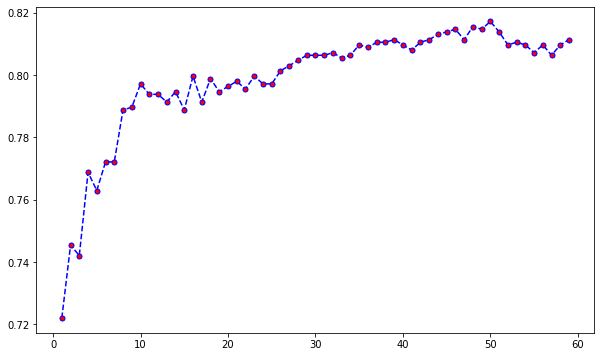

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracyScore,color = "blue",linestyle = "dashed",marker="o",markerfacecolor = "red",markersize = 5)

In [121]:
knn = KNeighborsClassifier(n_neighbors = 47)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=47)

In [116]:
# n_neighbors = sqrt(4788)
knn = KNeighborsClassifier(n_neighbors = 69)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=69)

In [122]:
y_pred = knn.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[775 108]
 [118 197]]


0.8113522537562604

**RANDOM FOREST**

In [96]:
from sklearn.ensemble import RandomForestClassifier
estimators = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
accuracyScore = []
for i in range(len(estimators)):
    rfc = RandomForestClassifier(n_estimators = estimators[i],max_depth = 5,random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracyScore.append(accuracy_score(y_test,y_pred))
print(accuracyScore)

[0.8021702838063439, 0.8096828046744574, 0.8088480801335559, 0.8096828046744574, 0.8055091819699499, 0.8080133555926544, 0.8046744574290484, 0.8046744574290484, 0.8055091819699499, 0.8038397328881469, 0.8080133555926544, 0.8063439065108514, 0.8071786310517529, 0.8063439065108514, 0.8063439065108514, 0.8080133555926544, 0.8046744574290484, 0.8055091819699499, 0.8021702838063439, 0.8038397328881469]


In [97]:
rfc = RandomForestClassifier(n_estimators = 25,max_depth=5,random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [1 1]
 [0 1]]


In [98]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[818  65]
 [168 147]]


0.8055091819699499